In [ ]:
# Name : Manjiri Naik
# Roll No. : 21102B0008
# Branch : BE CMPN-B

# ML Problem Statement 7 : Graph Based Clustering (Part 1)


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

In [2]:
facebook = pd.read_csv(
    "facebook_combined.txt",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

start_node  end_node
0               0         1
1               0         2
2               0         3
3               0         4
4               0         5
...           ...       ...
88229        4026      4030
88230        4027      4031
88231        4027      4032
88232        4027      4038
88233        4031      4038

[88234 rows x 2 columns]

In [3]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

In [4]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

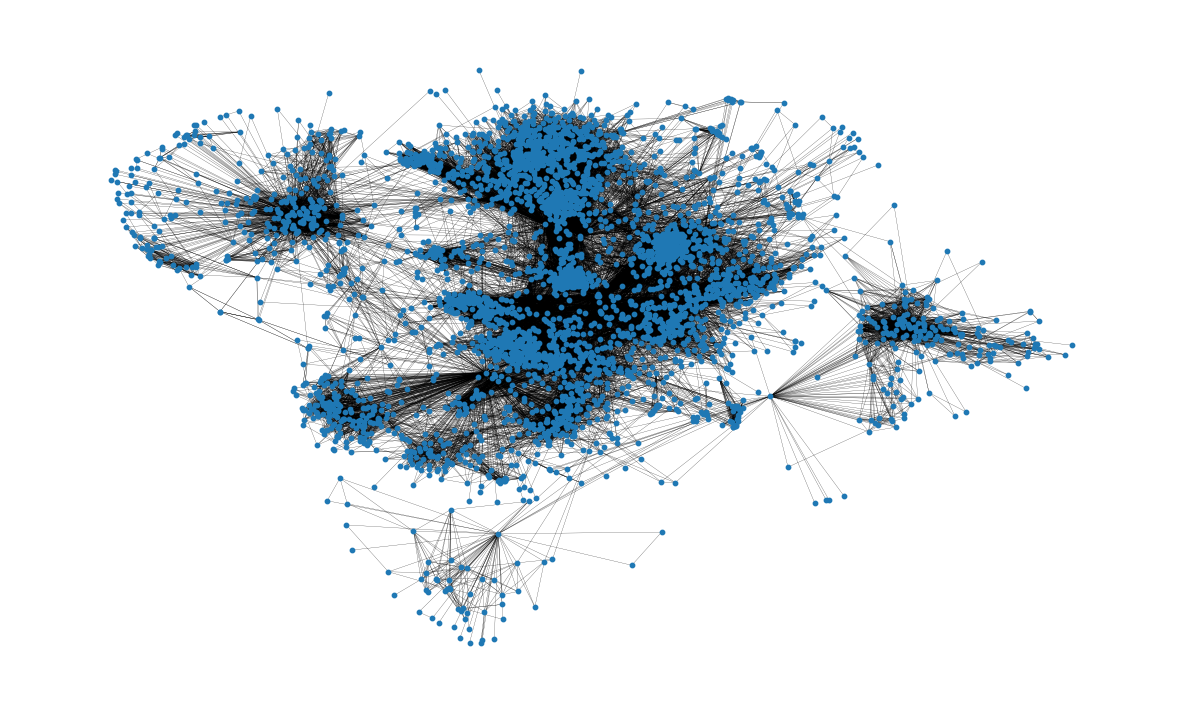

In [5]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [6]:
G.number_of_nodes()

4039

In [7]:
G.number_of_edges()

88234

In [8]:
np.mean([d for _, d in G.degree()])

43.69101262688784

In [9]:
#computing the shortest path length for all pairs of nodes in the network
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [10]:
shortest_path_lengths[0][42] # Length of shortest path between nodes 0 and 42

1

In [11]:
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

8

In [12]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

3.691592636562027

Text(0, 0.5, 'Frequency (%)')

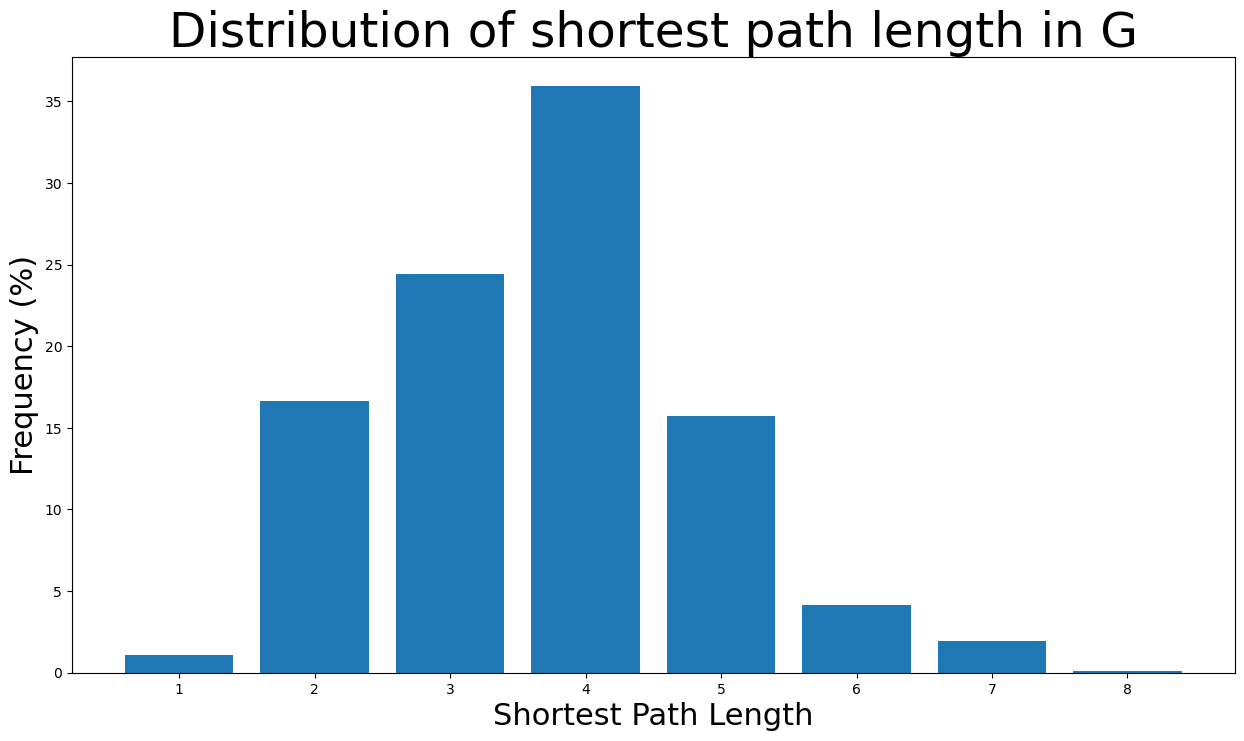

In [13]:
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [14]:
nx.density(G)

0.010819963503439287

In [15]:
nx.number_connected_components(G)

1

# Degree Centrality

In [16]:
degree_centrality = nx.centrality.degree_centrality(G)  
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

In [17]:
# Now we can also see the number of neighbors for the nodes with the highest degree centralities
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254)]

Text(0, 0.5, 'Counts')

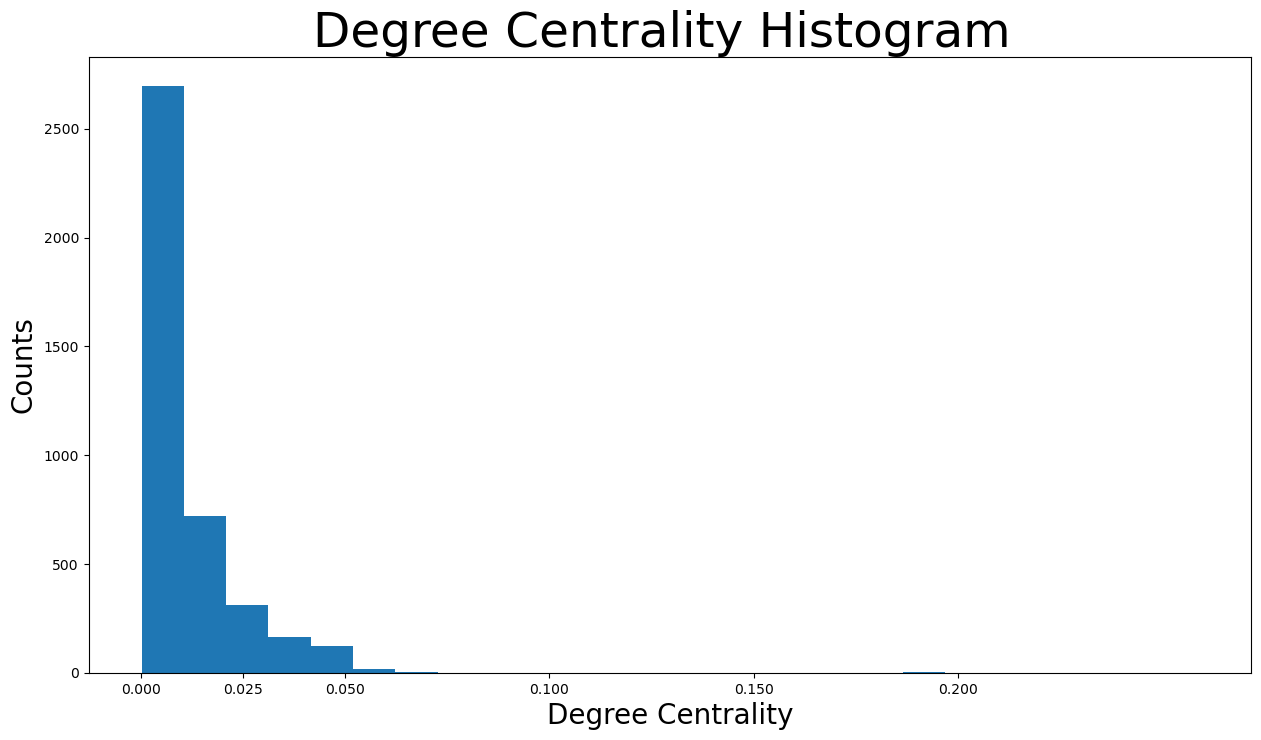

In [18]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

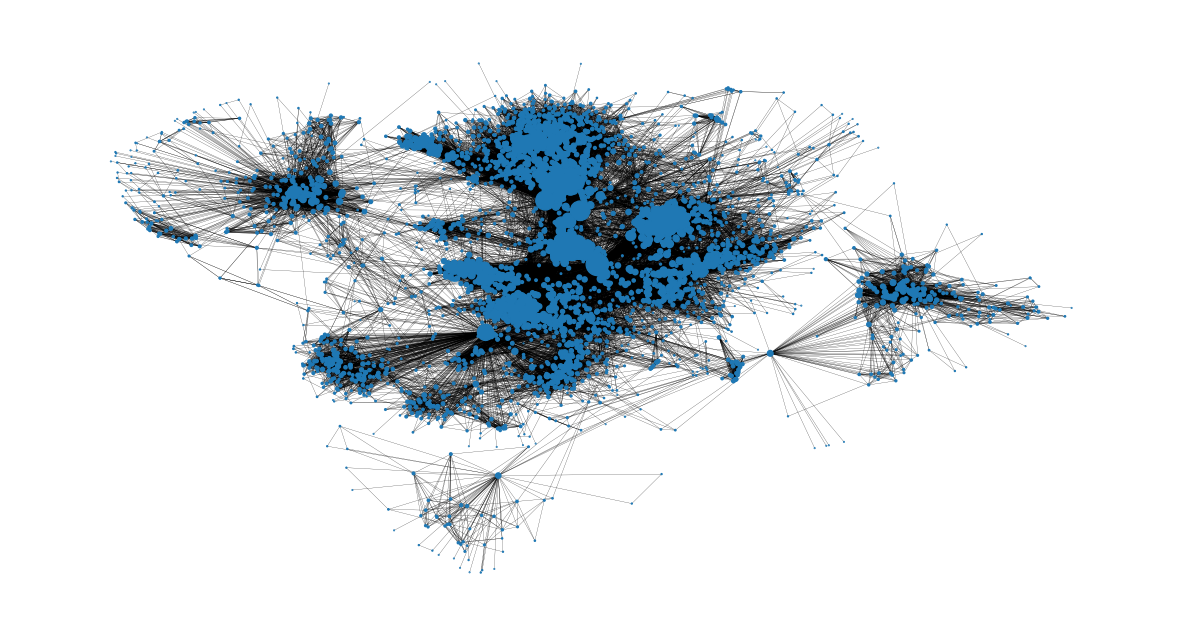

In [19]:
# let’s check the users with highest degree centralities from the size of their nodes
node_size = [v * 1000 for v in degree_centrality.values()] 
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

# Betweenness Centrality

In [20]:
betweenness_centrality = nx.centrality.betweenness_centrality(G)  
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215)]

Text(0, 0.5, 'Counts')

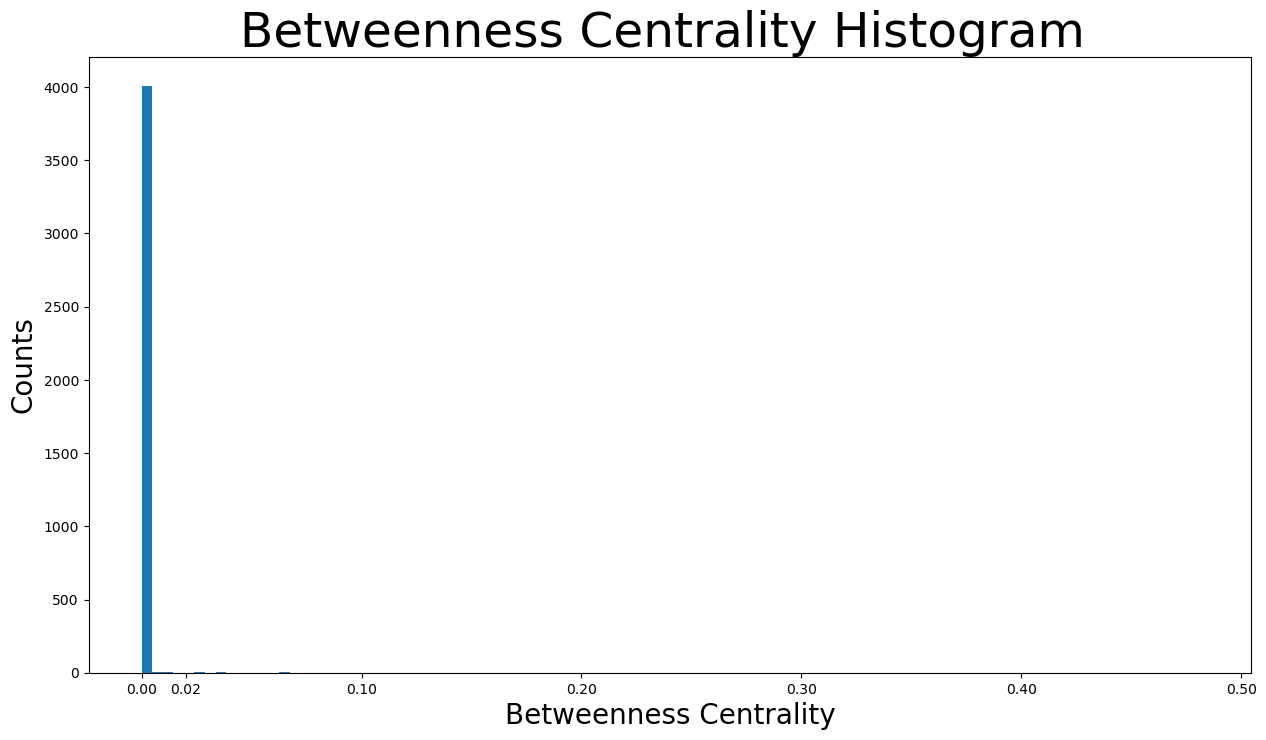

In [21]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

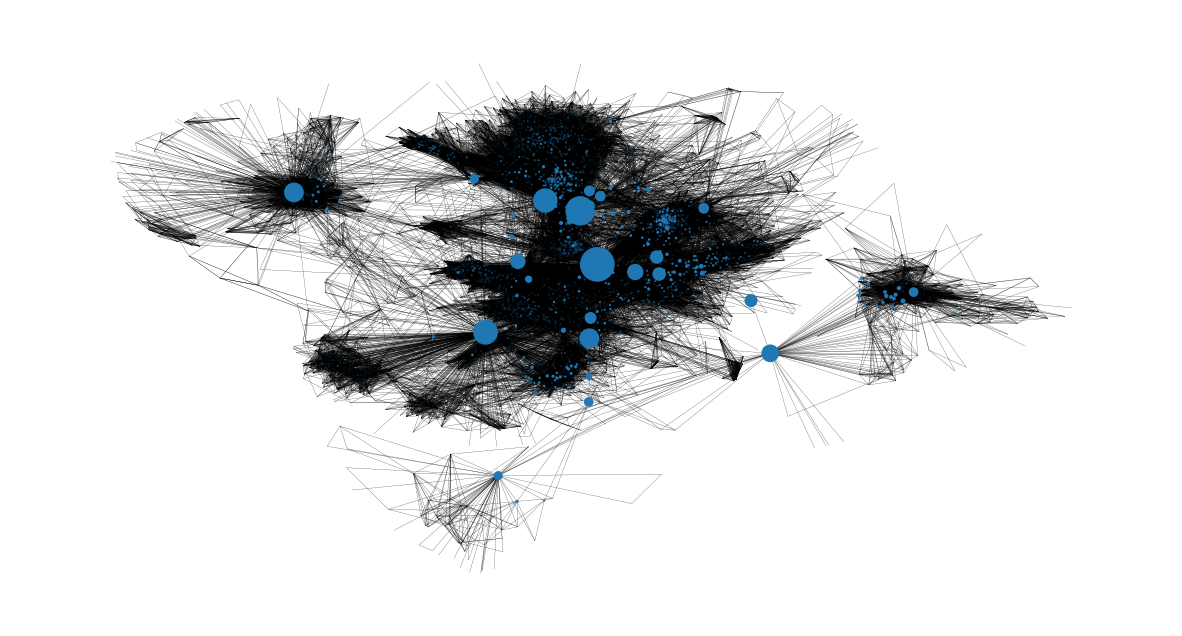

In [22]:
# We can also get an image on the nodes with the highest betweenness centralities and where they are located in the network.
node_size = [v * 1200 for v in betweenness_centrality.values()] 
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

# Closeness Centrality

In [23]:
closeness_centrality = nx.centrality.closeness_centrality(
    G
)  # save results in a variable to use again
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796),
 (171, 0.37049270575282134),
 (348, 0.36991572004397216),
 (483, 0.3698479575013739)]

In [24]:
1 / closeness_centrality[107]

2.1753343239227343

Text(0, 0.5, 'Counts')

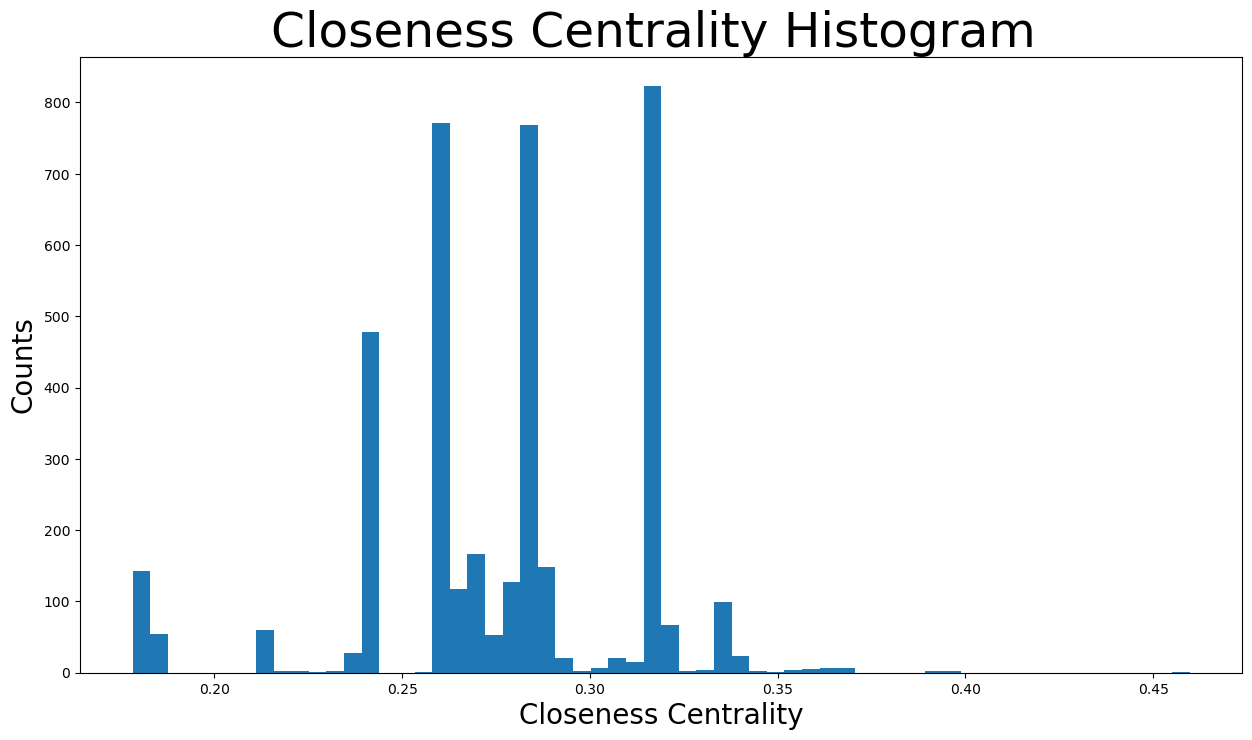

In [25]:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

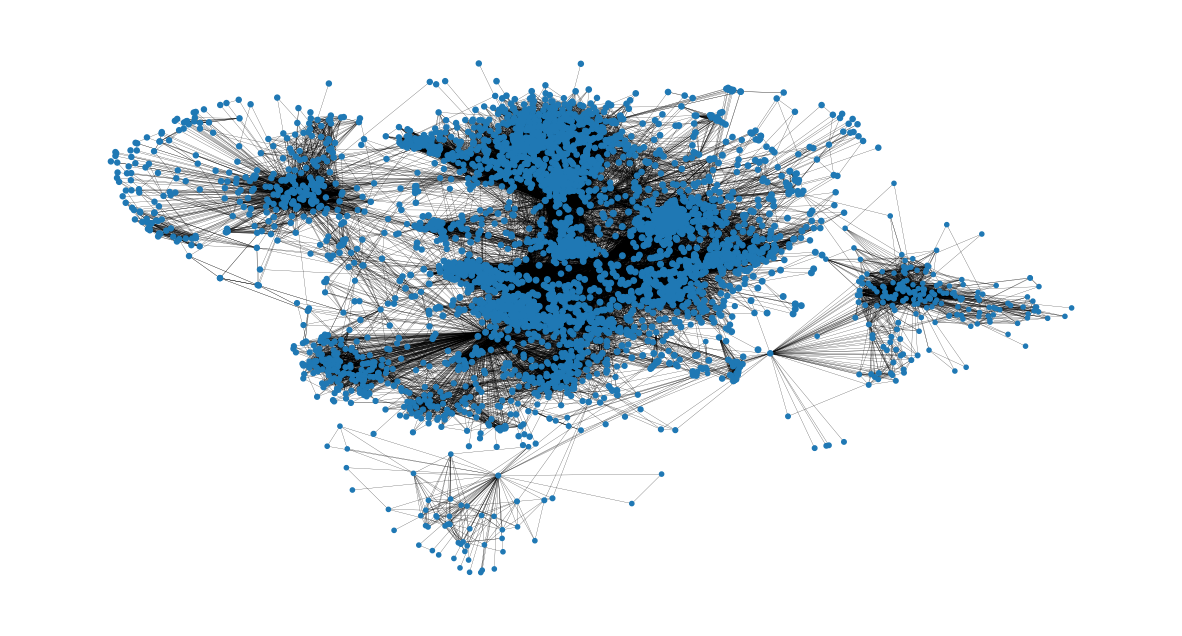

In [26]:
node_size = [
    v * 50 for v in closeness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [27]:
nx.average_clustering(G)

0.6055467186200876

Text(0, 0.5, 'Counts')

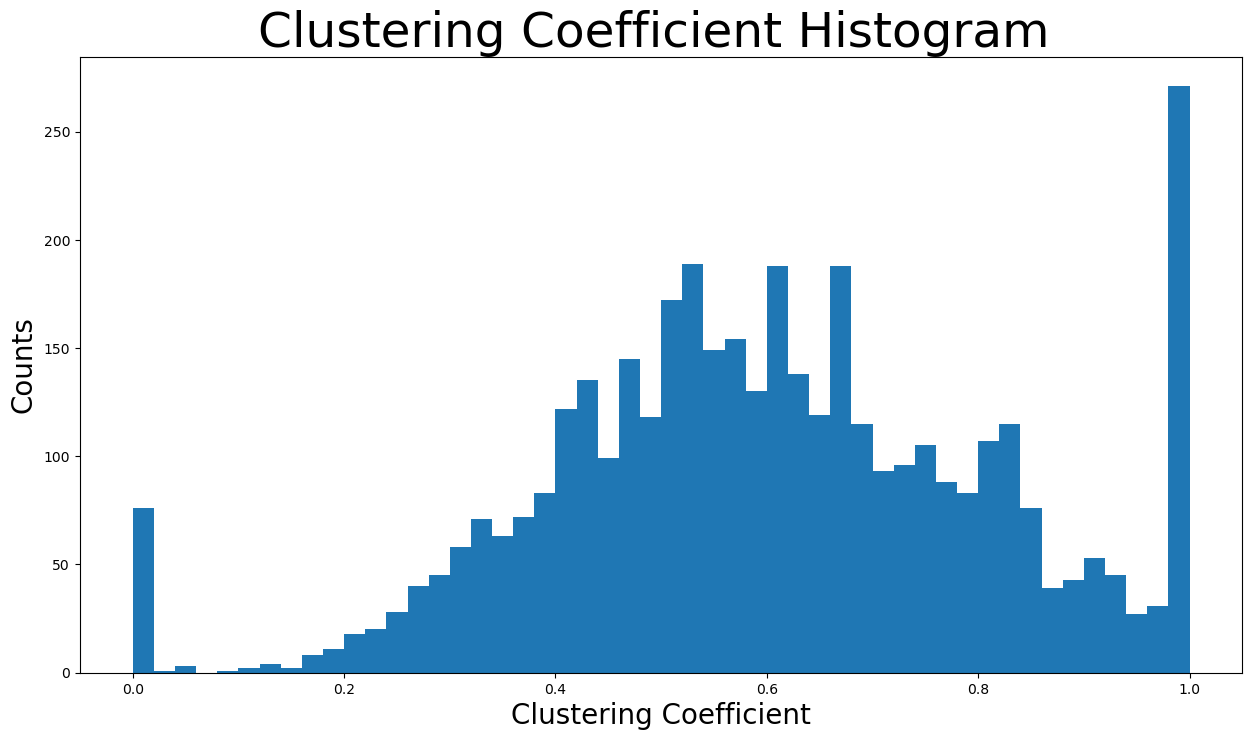

In [28]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [29]:
triangles_per_node = list(nx.triangles(G).values())
sum(
    triangles_per_node
) / 3

1612010.0

In [30]:
np.mean(triangles_per_node)

1197.3334983906907

In [31]:
np.median(triangles_per_node)

161.0

In [32]:
nx.has_bridges(G)

True

In [33]:
bridges = list(nx.bridges(G))
len(bridges)

75

In [34]:
local_bridges = list(nx.local_bridges(G, with_span=False))
len(local_bridges)

78

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

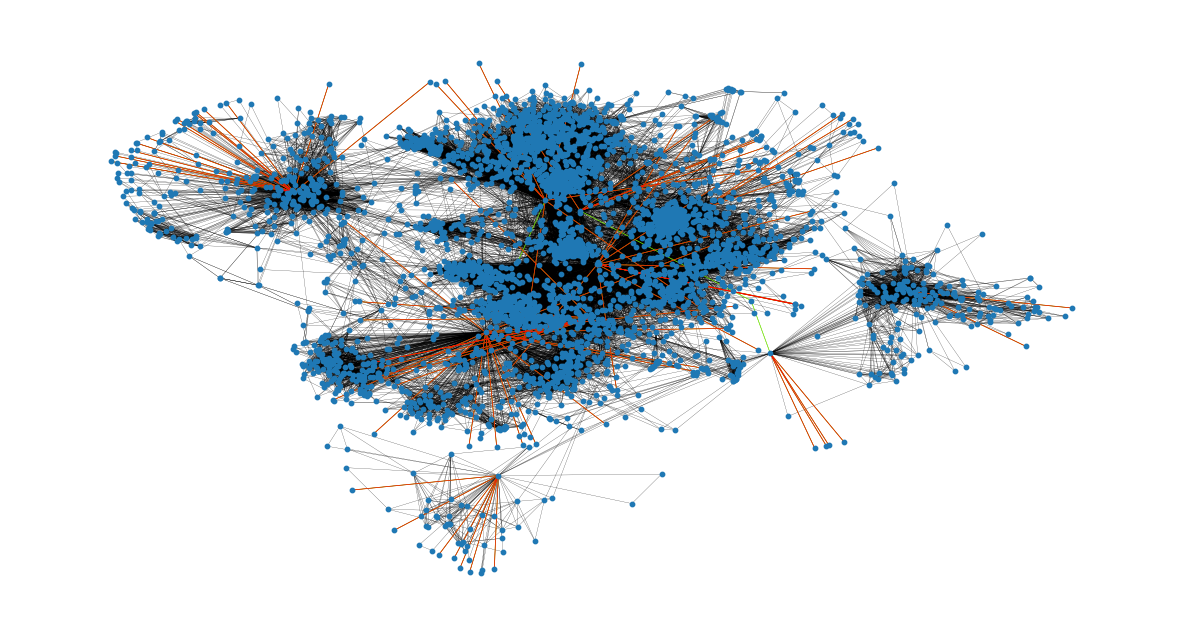

In [35]:
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(
    G, pos, edgelist=local_bridges, width=0.5, edge_color="lawngreen"
)  # green color for local bridges
nx.draw_networkx_edges(
    G, pos, edgelist=bridges, width=0.5, edge_color="r"
)  # red color for bridges
plt.axis("off")

In [36]:
colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

44

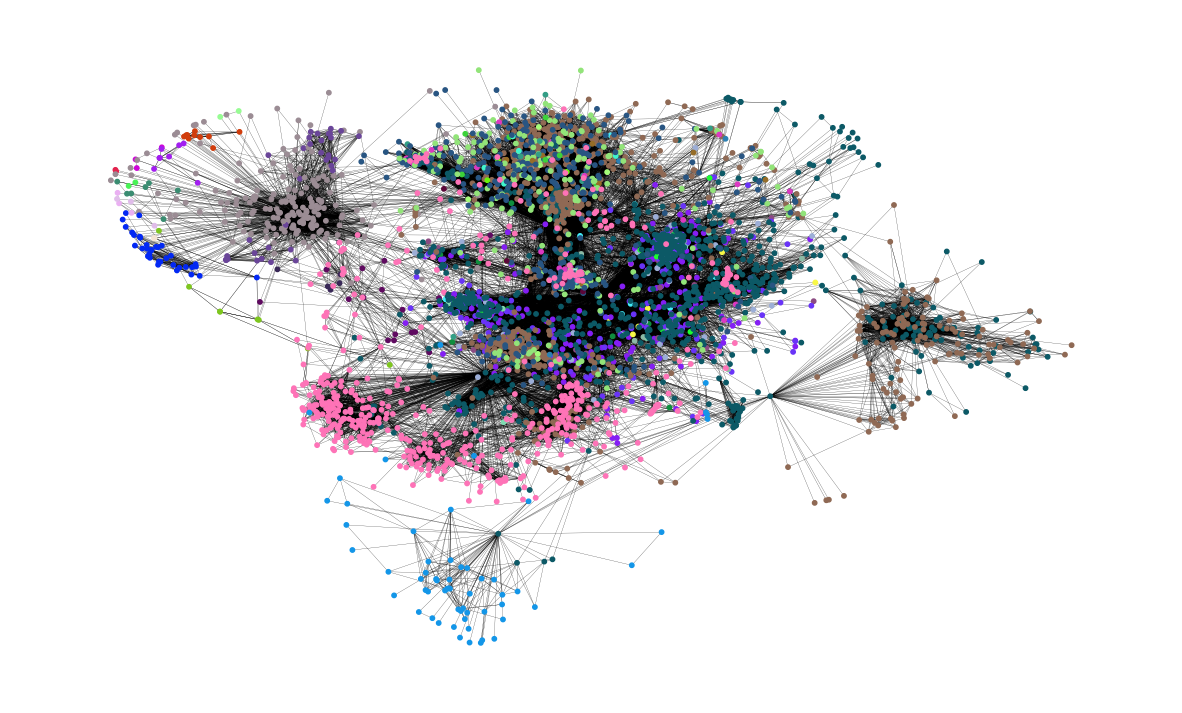

In [37]:
# communities were detected. 
# Now the communities are showcased in the graph. Each community is depicted with a different color 
# and its nodes are usually located close to each other
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)